<a href="https://colab.research.google.com/github/Mirabelljoicelaura/MACHINE-LEARNING/blob/main/Week9/Kelompok2_Jobsheet9_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jobsheet 9: Perceptron dan Artificial Neural Network (ANN)**

UJIAN TENGAH SEMESTER MACHINE LEARNING

KELOMPOK 2

Kelas : D4 Teknik Informatika / 3D

Anggota :

1. Alfi Surya / 2141720075
2. Mirabell Joice Laura / 2141720174
3. Muhamad Rafi Prabowo / 2141720239

## **Praktikum 1: Klasifikasi Iris dengan Perceptron**

Pada pratikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.

Untuk nembah pemahaman Anda terkait dengan model Perceptron, pada pratkikum ini Anda akan membuat model Perceptron tanpa menggunakan library.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Langkah 1 - Import Library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### **Langkah 2 - Load Data dan Visualisasi**

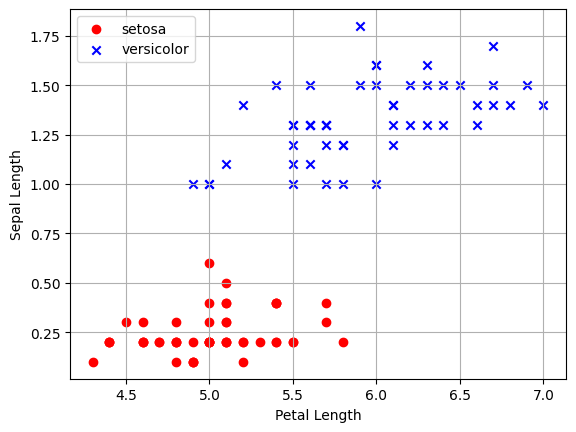

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### **Langkah 3 - Membuat Kelas Perceptron**

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### **Langkah 4 - Pilih Data dan Encoding Label**

In [ ]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

### **Langkah 5 - Fitting Model**

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

### **Langkah 6 - Visualisasi Nilai Error Per Epoch**

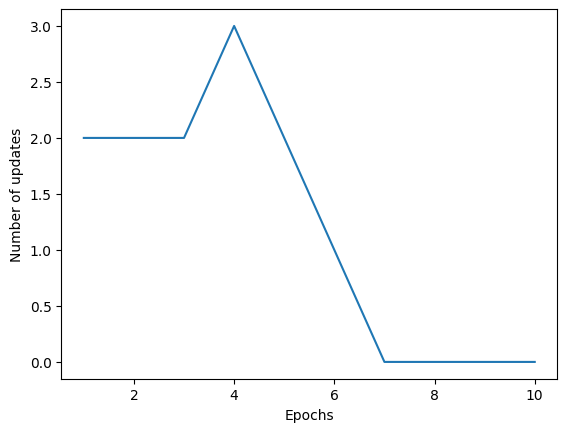

In [ ]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### **Langkah 7 - Visualiasasi Decision Boundary**

<ipython-input-11-d7f314ba4772>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


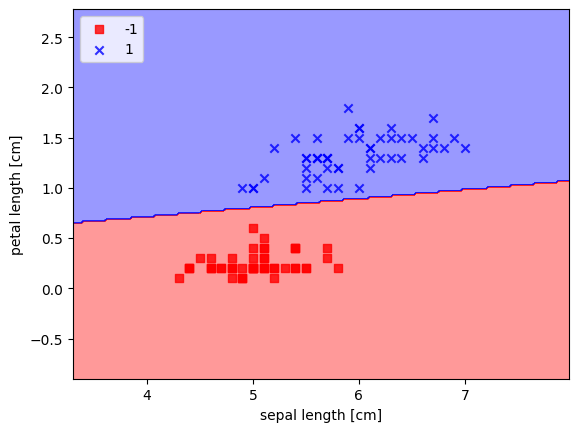

In [ ]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)
plot_decision_regions(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## **Praktikum 2**

Dalam kasus ini, Anda akan melakukan klasifiaksi berita berdasarkan 3 kategori, yaitu **Sport Hockey**, **Sport Baseball**, dan **Otomotif**. Proses klasifikasi akan menggunakan model Perceptron.

### **Langkah 1 - Import Library**

In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

### **Langkah 2 - Pilih Label dan Split Data**

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

### **Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron**

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



### **Penjelasan**

Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan `tfidf-vectorizer`.

## **Praktikum 3**

Pada kasus sederhana ini, Anda akan menggunakan MLP untuk mendapatkan nilai biner yang dioperasikan dengan logika XOR. Perlu diingat bahwa nilai XOR berbeda dengan OR, XOR hanya akan bernilai benar jika salah satu nilai yang benar, bukan keduanya atau tidak sama sekali.

### **Langkah 1 - Import Library**

In [ ]:
from sklearn.neural_network import MLPClassifier

### **Langkah 2 - Buat Data**

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

### **Langkah 3 - Fit Model**

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

### **Langkah 4 - Prediksi**

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


## **Praktikum 4**

Pada praktikum kali ini, Anda diminta untuk membuat model ANN untuk mengklasifikasi potensi seorang customer akan meninggalkan perusahaan Anda atau tidak. Istirlah populer dari fenomena ini disebut sebagai '*churn*'. Tingkat churn yang tinggi (*chrun rate*) akan berdampak tidak baik bagi perusahaan.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Pra Pengolahan Data**

#### **Langkah 1 - Import Library**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

#### **Langkah 2 - Load Data**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/machinelearn/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

Cek data (X)

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


#### **Langkah 3 - Encoding Data Kategorikal**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

Cek data (X) dengan print. Hasilnya,

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


#### **Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Cek data (X) dengan print. Hasilnya,

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


#### **Langkah 5 - Split Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### **Langkah 6 - Scaling Fitur**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Membuat Model ANN**

#### **Langkah 1 - Inisiasi Model ANN**

In [ ]:
ann = tf.keras.models.Sequential()

#### **Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama**

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#### **Langkah 3 - Membuat Hidden Layer Kedua**

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#### **Langkah 4 - Membuat Output Layer**

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### **Training Model**

#### **Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN**

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### **Langkah 2 - Fitting Model**

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5594 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4612 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4451 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4319 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4282 - accuracy: 0.7960
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4253 - accuracy: 0.7977
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4224 - accuracy: 0.8079
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4200 - accura

### **Membuat Prediksi**

Diberikan informasi sebagai berikut,

- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: $ 60000

- Number of Products: 2
- Does this customer have a credit card ? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

#### **Modelkan Data Baru dan Buat Prediksi**

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 100ms/step
[[False]]


Apakah hasilnya False?

#### **Prediksi Dengan Data Testing**

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


#### **Cek Akurasi dan Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1516   79]
 [ 198  207]]


0.8615

## **Tugas**

- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
- Anda diperbolehkan melakukan eksplorasi terhadap,
  - Metode pra pengolahan
  - Pemilihan fitur
  - Arsitektur ANN
  - Fungsi Aktiviasi
- ANN diimplementasikan dengan menggunakan tensorflow.
- DIKERJAKAN SECARA BERKELOMPOK
- JELASKAN HASIL YANG ANDA DAPATKAN,
  - AKURASI
  - CONFUSION MATRIX
  - KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

### **Jawab**

##Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

## Pre-processing

In [ ]:
# Memuat dan memproses dataset MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalisasi data

11490434/11490434 [==============================] - 0s 0us/step


##Permodelan ANN

In [ ]:
# Membuat dan mengompilasi model ANN
model = tf.keras.Sequential([
    # Lapisan Input
    Flatten(input_shape=(28, 28)),
    # Penerapan fungsi aktivasi
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# Mengevaluasi model pada data uji
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy = accuracy_score(y_test, y_pred_classes)
confusion_mat = confusion_matrix(y_test, y_pred_classes)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2656 - accuracy: 0.9230 - val_loss: 0.1412 - val_accuracy: 0.9591
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1139 - accuracy: 0.9661 - val_loss: 0.1403 - val_accuracy: 0.9582
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0797 - accuracy: 0.9754 - val_loss: 0.1024 - val_accuracy: 0.9697
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0590 - accuracy: 0.9811 - val_loss: 0.1187 - val_accuracy: 0.9658
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0462 - accuracy: 0.9852 - val_loss: 0.0966 - val_accuracy: 0.9729
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0357 - accuracy: 0.9883 - val_loss: 0.0997 - val_accuracy: 0.9723
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0309 - accuracy: 0.9899 - val_loss: 0.1154 - val_accuracy:

## Hasil Akurasi

In [ ]:
# Mencetak akurasi
print("Akurasi:", accuracy)

Akurasi: 0.9751


##Confusion Matrix

In [ ]:
print("Confusion Matriks:")
print(confusion_mat)

Confusion Matriks:
[[ 962    0    4    2    1    1    2    0    3    5]
 [   0 1121    2    1    0    1    4    1    5    0]
 [   4    6  999   10    1    0    2    5    5    0]
 [   0    0    3  986    0   11    0    2    2    6]
 [   0    0    1    2  956    2    4    1    3   13]
 [   0    0    0    4    1  879    3    0    2    3]
 [   4    2    2    1    5    7  934    0    3    0]
 [   1    4    7   10    1    0    0  992    5    8]
 [   0    0    2   11    2    6    0    3  948    2]
 [   0    4    0    5    8   13    0    3    2  974]]


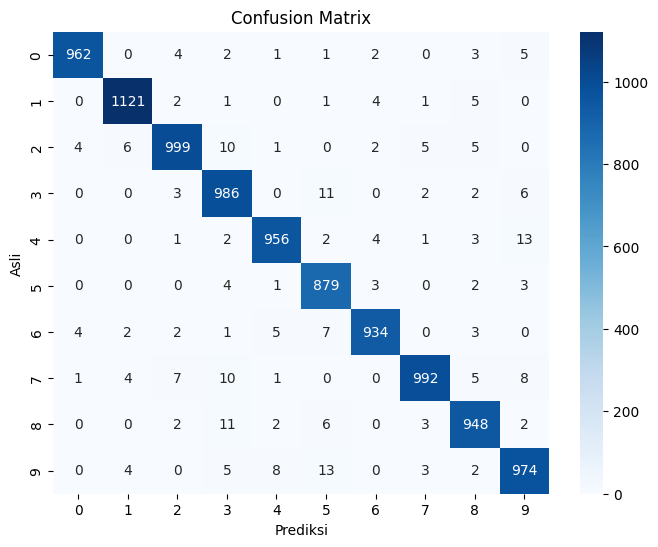

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Prediksi')
plt.ylabel('Asli')
plt.title('Confusion Matrix')
plt.show()

## Visualisasi Data Asli dan Data Prediksi

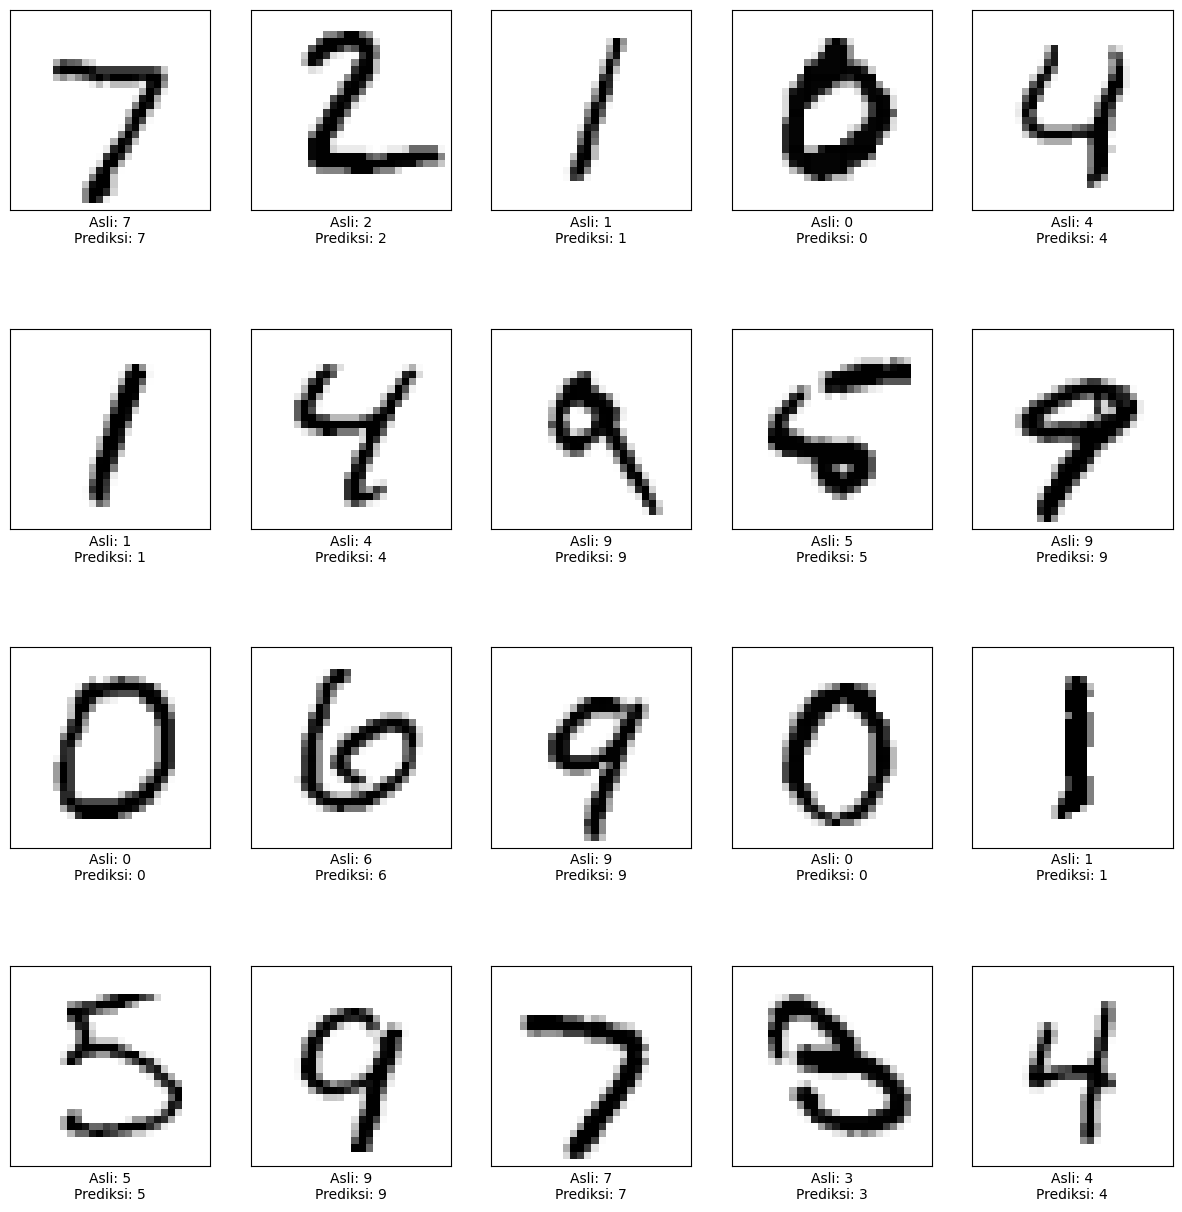

In [ ]:
 # Membuat figur dengan ukuran 15x20 (bisa disesuaikan)
plt.figure(figsize=(15, 20))
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Menampilkan gambar dalam skala hitam-putih
    plt.imshow(x_test[i], cmap=plt.cm.binary, interpolation='nearest')
    # Memeriksa apakah label asli dan prediksi cocok
    if y_test[i] == y_pred_classes[i]:
      # Jika cocok, label akan berwarna hitam
        label_color = 'black'
    else:
      # Jika tidak cocok, label akan berwarna merah
        label_color = 'red'
    plt.xlabel(f"Asli: {y_test[i]}\nPrediksi: {y_pred_classes[i]}", color=label_color)
# Menampilkan visualisasi gambar dan label asli/prediksi
plt.show()


##**KESIMPULAN**

1. **Akurasi,** dari proses pengolahan data menggunakan permodelan ANN didapatkan akurasi sebesar 0,9751 (97,51%). Hal ini menunjukkan bahwa sebagian besar prediksi yang dibuat dalam permodelan bernilai true/benar.

2. **Confusion Matrix,** merupaan tabel yang menunjukkan seberapa baik model yang digunakan untuk melakukan prediksi di setiap kelasnya.

    - True Positives (TP): Model secara efektif memprediksi sejumlah besar sampel sebagai kelas yang benar. Pada hasil confusion matrix diatas didapatkan nilai TP yang paling besar pada kelas 1 dengan nilai TP 1121.
    - False Positives (FP): Jumlah false positive cukup rendah, ada beberapa kasus di mana model memprediksi salah sebagai positif saat seharusnya negatif. Pada kelas 1 terdapat nilai FP terbesar yaitu 40.
    - False Negatives (FN): Terdapat beberapa False Negatives (prediksi negatif yang salah), yang berarti model salah memprediksi sebagai negatif saat seharusnya positif. Pada kelas 4 terdapat nilai FN yang paling besar yaitu 13

3. **Konfigurasi Model**
- Pre-processing :
 - Menggunakan TensorFlow untuk mengunduh dataset MNIST yang berisi citra-citra.
 - Melakukan split data menjadi data pelatihan (x_train,y_train) dan data pengujian (x_test,y_test)
 - Data dinormalisasi dengan membaginya dengan 255. Hal ini digunakan untuk mengubah rentang intensitas pixel dari 0-255 menjadi 0-1 untuk dilakukan pemrosesan citra
- Arsitektur ANN :
 - Membuat model neural network dengan menggunakan tf.keras.Sequential. Model ini merupakan feedforward ANN dengan beberapa lapisan.
 - Model menggunakan lapisan Flatten sebagai apisan input yang mengubah gambar menjadi pixel 1D.
 - Menggunakan 2 lapisan Dense dengan fungsi aktivasi 'relu' yang terdiri dari 128 dan 64 unit.
 - Lapisan terakhir adalah apisan Dense dengan fungsi aktivasi 'softmax' yang memiliki 10 unir sesuai dengan jumlah kelas (0-9)
 Model dikompilasi dengan optimizer 'adam', loss function 'sparse_categorical_crossentropy', dan metrik 'accuracy'.
- Pelatihan Model :
 - Menggunakan data pelatihan dengan 10 epoch dan validasi set sebesar 20% dari data pelatihan.
 - Model melakukan pelatihan dengan meminimalkan loss function dan memperbarui bobot sesuai dengan optimasi Adam.
- Evaluasi Model pada Data Uji  :
 - Model yang telah dilatih untuk melakukan prediksi pada data uji akan diuba menjadi kelas dengan nilai tertinggi kemudian dilakukan perhitungan akurasi model dengan membandingkan hasil prediksi dengan label sebenarnya menggunakan 'accuracy_score' dari scikit-learn serta menghitng confusion matrix dengan menggunakan confusion_matrix.